<a href="https://colab.research.google.com/github/Maffyo/Maffyo/blob/main/Quantitative_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breach_report(2).csv to breach_report(2).csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('breach_report(2).csv')

In [ ]:
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

                              Name of Covered Entity State  \
0  CareFirst BlueCross BlueShield Community Healt...    DC   
1                                 CVS Pharmacy, Inc.    RI   
2  BlueCross BlueShield of Tennessee, Inc. and Vo...    TN   
3           Roswell Park Comprehensive Cancer Center    NY   
4  AGC Flat Glass North America, Inc. Welfare Ben...    GA   

   Covered Entity Type  Individuals Affected Breach Submission Date  \
0   Business Associate                  2189             02/16/2024   
1  Healthcare Provider                  1896             02/16/2024   
2          Health Plan                   790             02/15/2024   
3  Healthcare Provider                   755             02/14/2024   
4          Health Plan                 13079             02/12/2024   

                   Type of Breach Location of Breached Information  \
0  Unauthorized Access/Disclosure                   Network Server   
1  Unauthorized Access/Disclosure                   Network 

In [ ]:
data.columns

Index(['Name of Covered Entity', 'State', 'Covered Entity Type',
       'Individuals Affected', 'Breach Submission Date', 'Type of Breach',
       'Location of Breached Information', 'Business Associate Present',
       'Web Description'],
      dtype='object')

In [ ]:
data.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,CareFirst BlueCross BlueShield Community Healt...,DC,Business Associate,2189,02/16/2024,Unauthorized Access/Disclosure,Network Server,Yes,NaN
1,"CVS Pharmacy, Inc.",RI,Healthcare Provider,1896,02/16/2024,Unauthorized Access/Disclosure,Network Server,No,NaN
2,"BlueCross BlueShield of Tennessee, Inc. and Vo...",TN,Health Plan,790,02/15/2024,Hacking/IT Incident,Network Server,No,NaN
3,Roswell Park Comprehensive Cancer Center,NY,Healthcare Provider,755,02/14/2024,Hacking/IT Incident,Email,No,NaN
4,"AGC Flat Glass North America, Inc. Welfare Ben...",GA,Health Plan,13079,02/12/2024,Hacking/IT Incident,Network Server,No,NaN


In [ ]:
data.drop(columns=['Web Description'], inplace=True)

In [ ]:
data.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,CareFirst BlueCross BlueShield Community Healt...,DC,Business Associate,2189,02/16/2024,Unauthorized Access/Disclosure,Network Server,Yes
1,"CVS Pharmacy, Inc.",RI,Healthcare Provider,1896,02/16/2024,Unauthorized Access/Disclosure,Network Server,No
2,"BlueCross BlueShield of Tennessee, Inc. and Vo...",TN,Health Plan,790,02/15/2024,Hacking/IT Incident,Network Server,No
3,Roswell Park Comprehensive Cancer Center,NY,Healthcare Provider,755,02/14/2024,Hacking/IT Incident,Email,No
4,"AGC Flat Glass North America, Inc. Welfare Ben...",GA,Health Plan,13079,02/12/2024,Hacking/IT Incident,Network Server,No


In [ ]:
print(data.isnull().sum())

Name of Covered Entity              0
State                               4
Covered Entity Type                 1
Individuals Affected                0
Breach Submission Date              0
Type of Breach                      0
Location of Breached Information    0
Business Associate Present          0
dtype: int64


In [ ]:
print(data.describe())

       Individuals Affected
count          8.600000e+02
mean           1.904512e+05
std            8.313453e+05
min            5.000000e+02
25%            1.375750e+03
50%            6.462500e+03
75%            4.628100e+04
max            1.127000e+07


In [ ]:
total_individuals_affected = data['Individuals Affected'].sum()
print("Total Individuals Affected:", total_individuals_affected)

Total Individuals Affected: 163788072


In [ ]:
data['Breach Submission Date'] = pd.to_datetime(data['Breach Submission Date'])

data['Year'] = data['Breach Submission Date'].dt.year

In [ ]:
data.head()

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Year
0,CareFirst BlueCross BlueShield Community Healt...,DC,Business Associate,2189,2024-02-16,Unauthorized Access/Disclosure,Network Server,Yes,2024
1,"CVS Pharmacy, Inc.",RI,Healthcare Provider,1896,2024-02-16,Unauthorized Access/Disclosure,Network Server,No,2024
2,"BlueCross BlueShield of Tennessee, Inc. and Vo...",TN,Health Plan,790,2024-02-15,Hacking/IT Incident,Network Server,No,2024
3,Roswell Park Comprehensive Cancer Center,NY,Healthcare Provider,755,2024-02-14,Hacking/IT Incident,Email,No,2024
4,"AGC Flat Glass North America, Inc. Welfare Ben...",GA,Health Plan,13079,2024-02-12,Hacking/IT Incident,Network Server,No,2024


In [ ]:
breach_counts = data['Type of Breach'].value_counts()
print("\nBreach Counts by Type:\n", breach_counts)


Breach Counts by Type:
 Hacking/IT Incident               723
Unauthorized Access/Disclosure    112
Theft                              13
Loss                                8
Improper Disposal                   4
Name: Type of Breach, dtype: int64


In [ ]:
business_associate_counts = data['Business Associate Present'].value_counts()
print("\nPresence of Business Associates in Breaches:\n", business_associate_counts)


Presence of Business Associates in Breaches:
 No     595
Yes    265
Name: Business Associate Present, dtype: int64


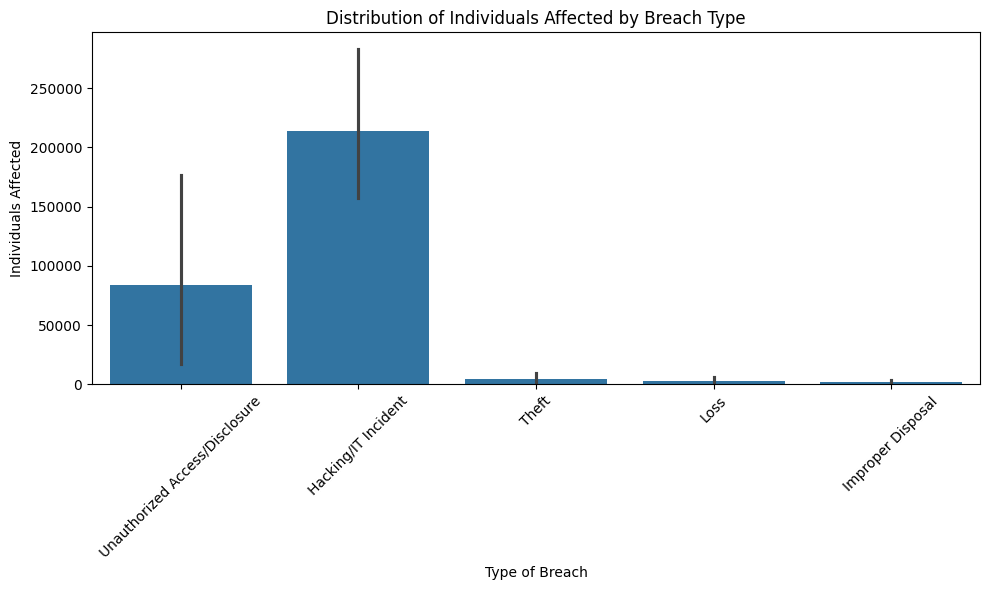

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Breach', y='Individuals Affected', data=data)
plt.title('Distribution of Individuals Affected by Breach Type')
plt.xlabel('Type of Breach')
plt.ylabel('Individuals Affected')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
breach_counts_yearly = data.groupby('Year').size()
severity_by_year = data.groupby('Year')['Individuals Affected'].sum()

In [ ]:
breach_types_counts = data['Type of Breach'].value_counts()

In [ ]:
state_counts = data['State'].value_counts()

In [ ]:
ba_counts = data['Business Associate Present'].value_counts()

In [ ]:
total_individuals_affected = data['Individuals Affected'].sum()

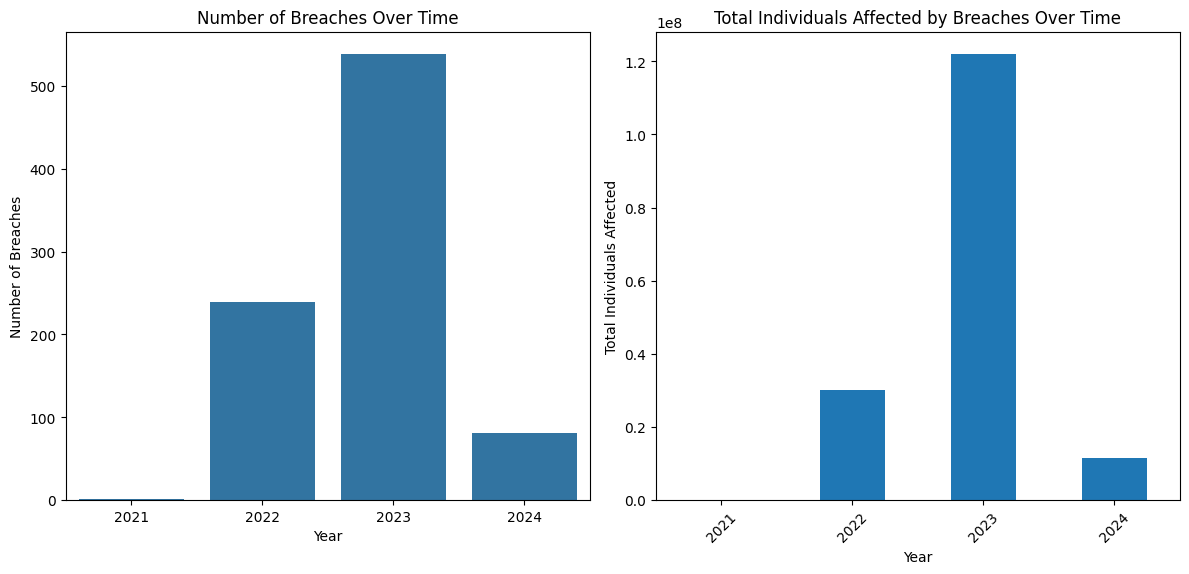

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Year', data=data)
plt.title('Number of Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')

plt.subplot(1, 2, 2)
severity_by_year.plot(kind='bar')
plt.title('Total Individuals Affected by Breaches Over Time')
plt.xlabel('Year')
plt.ylabel('Total Individuals Affected')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

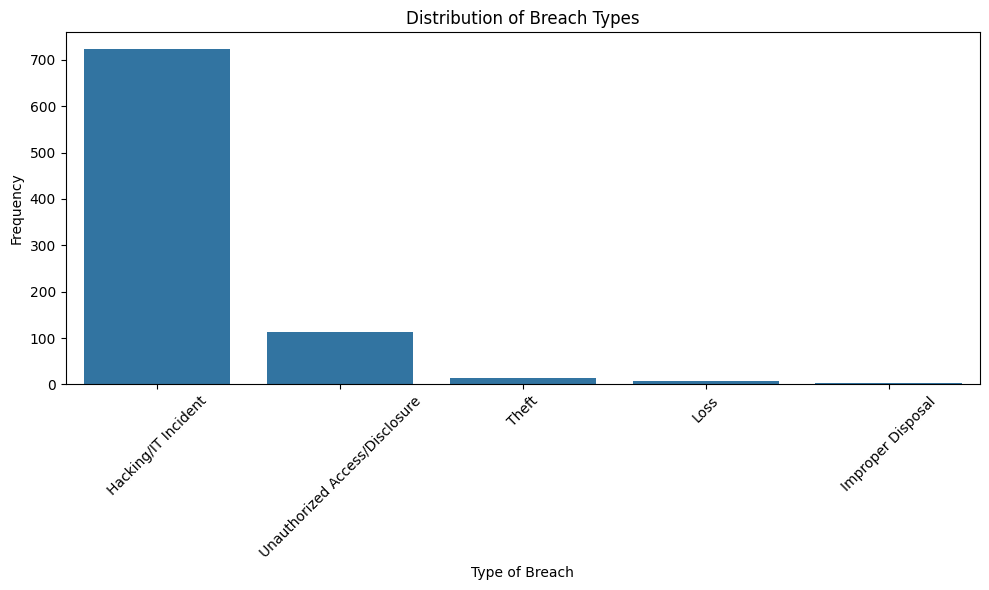

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=breach_types_counts.index, y=breach_types_counts.values)
plt.title('Distribution of Breach Types')
plt.xlabel('Type of Breach')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

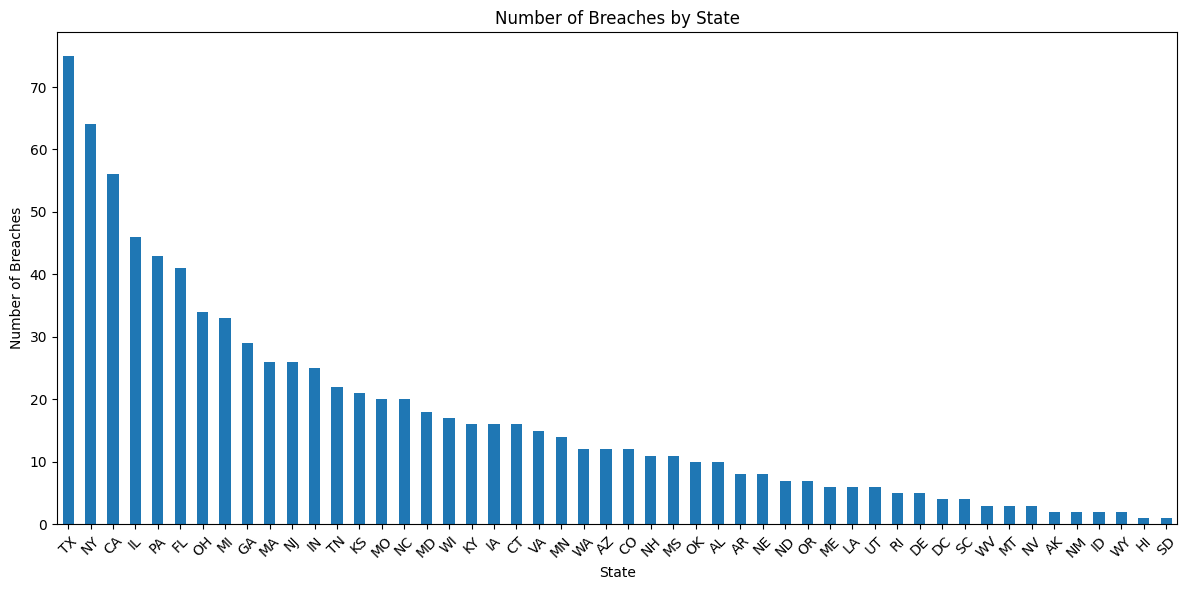

In [ ]:
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Number of Breaches by State')
plt.xlabel('State')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

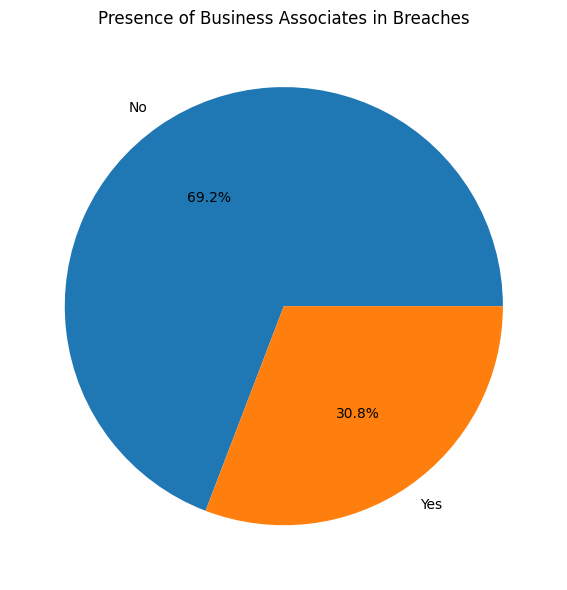

In [ ]:
plt.figure(figsize=(6, 6))
ba_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Presence of Business Associates in Breaches')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
entity_type_counts = data['Covered Entity Type'].value_counts()
entity_type_percentages = entity_type_counts / entity_type_counts.sum() * 100

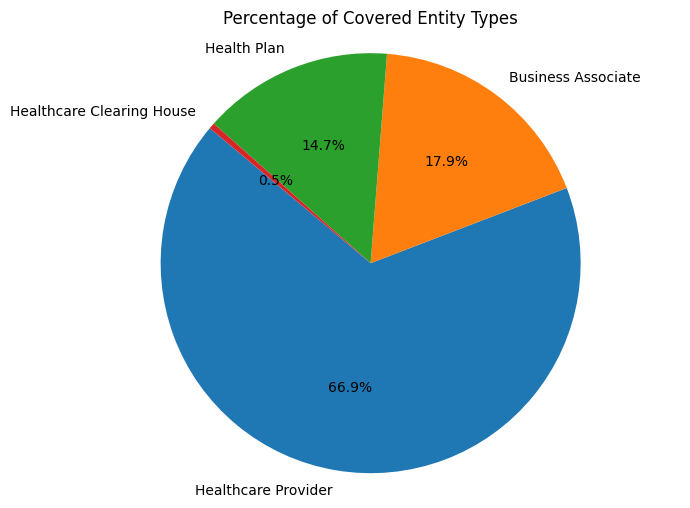

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(entity_type_percentages, labels=entity_type_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Covered Entity Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

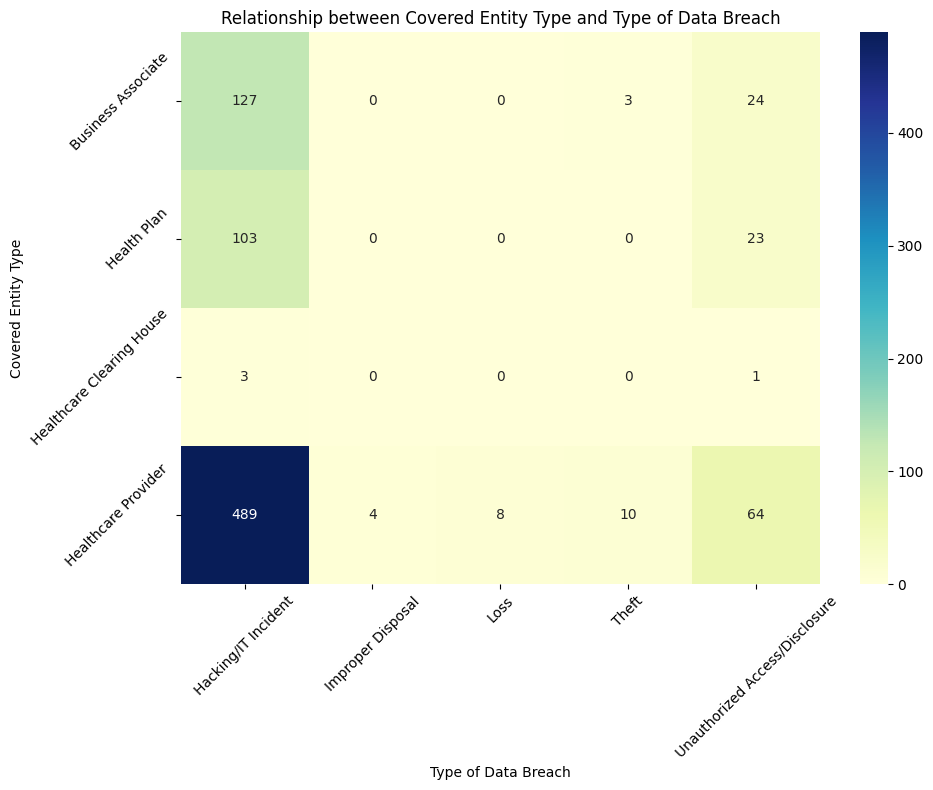

In [ ]:
breach_counts = data.groupby(['Covered Entity Type', 'Type of Breach']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(breach_counts, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Relationship between Covered Entity Type and Type of Data Breach')
plt.xlabel('Type of Data Breach')
plt.ylabel('Covered Entity Type')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
earliest_breach_date = data['Breach Submission Date'].min()
latest_breach_date = data['Breach Submission Date'].max()
breach_duration = latest_breach_date - earliest_breach_date
print("Healthcare providers have experienced breaches for a duration of:", breach_duration)

Healthcare providers have experienced breaches for a duration of: 942 days 00:00:00


In [ ]:
healthcare_providers_df = data[data['Covered Entity Type'] == 'Healthcare Provider']

breach_counts = healthcare_providers_df['Type of Breach'].value_counts()

most_common_breach = breach_counts.idxmax()
most_common_breach_count = breach_counts.max()

print("Healthcare providers are most susceptible to the following type of breach:")
print("Type of Breach:", most_common_breach)
print("Count:", most_common_breach_count)

Healthcare providers are most susceptible to the following type of breach:
Type of Breach: Hacking/IT Incident
Count: 489


In [ ]:
breach_data = pd.DataFrame({
    'Breach Type': ['Unauthorized Access/Disclosure', 'Hacking/IT Incident', 'Loss', 'Theft'],
    'Frequency': [120, 180, 150, 90]  # Example breach frequencies
})

# Display breach frequency for each breach type
print("Breach Frequency for Each Breach Type:")
print(breach_data)

Breach Frequency for Each Breach Type:
                      Breach Type  Frequency
0  Unauthorized Access/Disclosure        120
1             Hacking/IT Incident        180
2                            Loss        150
3                           Theft         90


In [ ]:
import numpy as np

np.random.seed(0)

# Sample data for breach types and frequencies
breach_types = ['Unauthorized Access/Disclosure', 'Hacking/IT Incident', 'Loss', 'Theft']
breach_frequencies = np.random.randint(50, 200, size=len(breach_types))

# Create DataFrame
breach_data = pd.DataFrame({'Breach Type': breach_types, 'Frequency': breach_frequencies})

# Display the generated breach data
print("Breach Frequency for Each Breach Type:")
print(breach_data)

Breach Frequency for Each Breach Type:
                      Breach Type  Frequency
0  Unauthorized Access/Disclosure         97
1             Hacking/IT Incident        167
2                            Loss        117
3                           Theft        153


In [ ]:
from scipy.stats import chi2_contingency

# Hypothesis testing: Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency([observed_values, expected_values])
print("\nChi-square test result:")
print("Chi-square value:", chi2)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nReject null hypothesis: There is a significant association between breach frequencies and breach types.")
else:
    print("\nFail to reject null hypothesis: There is no significant association between breach frequencies and breach types.")


Chi-square test result:
Chi-square value: 11.907006908360595
p-value: 0.00770860008078803

Reject null hypothesis: There is a significant association between breach frequencies and breach types.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 12.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=1b9666b00347db616d874e18e225f266ced1995eb1e2c922dd0438eaca8ea895
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


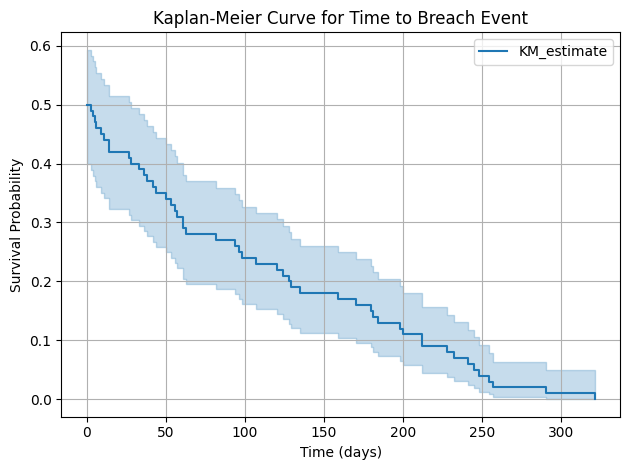

In [ ]:
!pip install lifelines

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Simulate example time-to-event data
np.random.seed(0)
n_samples = 100
breach_dates = pd.to_datetime(np.random.choice(pd.date_range(start='2022-01-01', periods=365, freq='D'), size=n_samples))
censor_dates = pd.to_datetime(np.random.choice(pd.date_range(start='2022-01-01', periods=365, freq='D'), size=n_samples))

# Ensure breach dates are before censor dates
breach_dates = np.where(breach_dates <= censor_dates, breach_dates, censor_dates)

# Create DataFrame
survival_data = pd.DataFrame({'Breach Date': breach_dates, 'Censor Date': censor_dates})

# Compute time to event
survival_data['Time to Event'] = (survival_data['Censor Date'] - survival_data['Breach Date']).dt.days

# Plot Kaplan-Meier curve
kmf = KaplanMeierFitter()
kmf.fit(survival_data['Time to Event'], event_observed=(survival_data['Time to Event'] < 365))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Curve for Time to Breach Event')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()